<a href="https://colab.research.google.com/github/hsuemily/CE888_Hsu-Chi-Rou_1900759/blob/master/Assignment/Dataset3_SafeDriver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library

In [1]:
# Import library
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.  Load Dataset

In [2]:
# Load data
# Colab library to upload files to notebook, Ref:https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Load data from Kaggle to Google Colab virtual machine
os.environ['KAGGLE_USERNAME'] = "emilyhsucr" # username from the json file
os.environ['KAGGLE_KEY'] = "3b6aa5aa02b468c89e4cfac52a5d992e" # key from the json file
!kaggle competitions download -c porto-seguro-safe-driver-prediction # api copied from kaggle

 30% 9.00M/30.0M [00:00<00:00, 30.0MB/s]
100% 30.0M/30.0M [00:00<00:00, 67.6MB/s]
  0% 0.00/2.12M [00:00<?, ?B/s]
100% 2.12M/2.12M [00:00<00:00, 140MB/s]
 79% 35.0M/44.4M [00:00<00:00, 46.9MB/s]
100% 44.4M/44.4M [00:00<00:00, 90.3MB/s]


In [0]:
## Porto Seguro’s Safe Driver Prediction 
SafeDriver = pd.read_csv('train.csv.zip')

In [4]:
SafeDriver.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [5]:
SafeDriver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## 3. Data Visualization

will not initiate an auto insurance claim (0): 573518
will initiate an auto insurance claim (1): 21694
Imbalance rate: 96.36 %


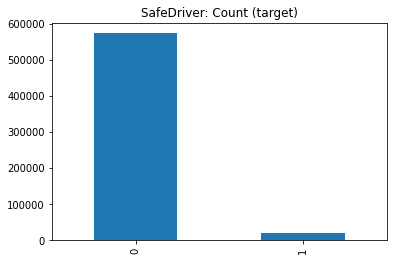

In [6]:
# Plot histogram of the label target in Safe Driver dataset
pd.Series(SafeDriver['target']).value_counts().plot(kind='bar',title='SafeDriver: Count (target)')
target_count = SafeDriver.target.value_counts()
print('will not initiate an auto insurance claim (0):', target_count[0])
print('will initiate an auto insurance claim (1):', target_count[1])
print('Imbalance rate:', round((target_count[0] / (target_count[0]+target_count[1]))*100, 2), '%')

## 4. Data Preprocessing
 - 4.1 Missing Value
 - 4.2 Normalization

### 4.1 Missing Value

In [7]:
# dealing with missing value

#*****SafeDriver
total = SafeDriver.isnull().sum().sort_values(ascending=False)
# summarize the amount of missing value in each attributes, and then sort it by descending order
# percent = the counts of missing value /the counts of item (in each attribute)
percent = (SafeDriver.isnull().sum()/SafeDriver.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
ps_calc_20_bin,0,0.0
ps_ind_13_bin,0,0.0
ps_car_04_cat,0,0.0
ps_car_03_cat,0,0.0
ps_car_02_cat,0,0.0


### 4.2 Normalization

In [8]:
# Normalize dataset - SafeDriver
SafeDriver_copy = SafeDriver.copy()
for col in SafeDriver_copy.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    SafeDriver_copy[col] = mms.fit_transform(SafeDriver_copy[[col]])
SafeDriver_copy.describe()

# separate the data in to x and y
SafeDriver_X = SafeDriver_copy.drop('target', axis = 1)
SafeDriver_X=SafeDriver_X.values
SafeDriver_Y = np.array(SafeDriver_copy['target'])
print("SafeDriver:",SafeDriver_X)
print(SafeDriver_X.shape)
print(SafeDriver_Y.shape)

SafeDriver: [[0.00000000e+00 2.85714286e-01 6.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.34406796e-06 1.42857143e-01 4.00000000e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [4.03220387e-06 7.14285714e-01 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [9.99993280e-01 1.42857143e-01 4.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99995968e-01 7.14285714e-01 6.00000000e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 4.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(595212, 58)
(595212,)


## 5. Supervised Learning
### 5.1 Decision tree (cross-validation)
### 5.2 Random forest (cross-validation)

In [9]:
## Decision tree 

### Ref_1: https://www.kaggle.com/sudhirnl7/logistic-regression-with-stratifiedkfold
### Ref_2: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#
#Import library
from sklearn import tree
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
cv_percisionDT =[]
cv_recallDT =[]
cv_F1scoreDT =[]
cv_scoreDTRoc = []
i=1
for train_index,test_index in Skf.split(SafeDriver_X,SafeDriver_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = SafeDriver_X[train_index],SafeDriver_X[test_index]
    y_tr,y_v = SafeDriver_Y[train_index],SafeDriver_Y[test_index]
    
    #model
    modelDT = tree.DecisionTreeClassifier(criterion = "entropy",random_state=1)
    # model = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=15, max_features=14, criterion = "entropy",random_state=1)
    modelDT.fit(x_tr,y_tr)
    percisionDT=precision_score(y_v,modelDT.predict(x_v))
    recallDT=recall_score(y_v,modelDT.predict(x_v))
    F1scoreDT=f1_score(y_v,modelDT.predict(x_v))
    scoreDTRoc = roc_auc_score(y_v,modelDT.predict(x_v))

    cv_percisionDT.append(percisionDT)
    cv_recallDT.append(recallDT)
    cv_F1scoreDT.append(F1scoreDT)
    cv_scoreDTRoc.append(scoreDTRoc)

    print('Confusion matrix\n',confusion_matrix(y_v,modelDT.predict(x_v)))
    print('Precision:', precision_score(y_v,modelDT.predict(x_v)))
    print('Recall:',recall_score(y_v,modelDT.predict(x_v)))
    print('F1 score:', f1_score(y_v,modelDT.predict(x_v)))
    print('ROC AUC score:',scoreDTRoc)

    i+=1 

1 of KFold 10
Confusion matrix
 [[54892  2460]
 [ 2054   116]]
Precision: 0.04503105590062112
Recall: 0.053456221198156684
F1 score: 0.048883270122208174
ROC AUC score: 0.5052816048102654
2 of KFold 10
Confusion matrix
 [[54764  2588]
 [ 2049   121]]
Precision: 0.04466592838685862
Recall: 0.05576036866359447
F1 score: 0.04960032793605247
ROC AUC score: 0.5053177627946234
3 of KFold 10
Confusion matrix
 [[54790  2562]
 [ 2051   118]]
Precision: 0.04402985074626865
Recall: 0.054402950668510835
F1 score: 0.04866982883068674
ROC AUC score: 0.5048657241834673
4 of KFold 10
Confusion matrix
 [[54987  2365]
 [ 2055   114]]
Precision: 0.045986284792254944
Recall: 0.05255878284923928
F1 score: 0.04905335628227194
ROC AUC score: 0.5056611043552934
5 of KFold 10
Confusion matrix
 [[54814  2538]
 [ 2049   120]]
Precision: 0.045146726862302484
Recall: 0.05532503457814661
F1 score: 0.049720323182100686
ROC AUC score: 0.5055360003411029
6 of KFold 10
Confusion matrix
 [[54802  2550]
 [ 2046   123]]
P

In [10]:
from statistics import mean, stdev
print("Mean of percision:", round(mean(cv_percisionDT),3), '\nStandard Deviation of percision:', round(stdev(cv_percisionDT),3))
print("Mean of recall:", round(mean(cv_recallDT),3), '\nStandard Deviation of recall:', round(stdev(cv_recallDT),3))
print("Mean of F1score:", round(mean(cv_F1scoreDT),3), '\nStandard Deviation of F1score:', round(stdev(cv_F1scoreDT),3))
print("Mean of Roc score:", round(mean(cv_scoreDTRoc),3), '\nStandard Deviation of Roc score:', round(stdev(cv_scoreDTRoc),3))

Mean of percision: 0.045 
Standard Deviation of percision: 0.003
Mean of recall: 0.054 
Standard Deviation of recall: 0.003
Mean of F1score: 0.049 
Standard Deviation of F1score: 0.003
Mean of Roc score: 0.505 
Standard Deviation of Roc score: 0.002


In [11]:
## Random forest
from sklearn.ensemble import RandomForestClassifier
cv_percisionRF =[]
cv_recallRF =[]
cv_F1scoreRF =[]
cv_scoreRFRoc = []
i=1
for train_index,test_index in Skf.split(SafeDriver_X,SafeDriver_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = SafeDriver_X[train_index],SafeDriver_X[test_index]
    y_tr,y_v = SafeDriver_Y[train_index],SafeDriver_Y[test_index]
    
    #model
    modelRF = RandomForestClassifier(random_state=1)
    modelRF.fit(x_tr,y_tr)

    percisionRF=precision_score(y_v,modelRF.predict(x_v))
    recallRF=recall_score(y_v,modelRF.predict(x_v))
    F1scoreRF=f1_score(y_v,modelRF.predict(x_v))
    scoreRFRoc = roc_auc_score(y_v,modelRF.predict(x_v))

    cv_percisionRF.append(percisionRF)
    cv_recallRF.append(recallRF)
    cv_F1scoreRF.append(F1scoreRF)
    cv_scoreRFRoc.append(scoreRFRoc)

    print('Confusion matrix\n',confusion_matrix(y_v,modelRF.predict(x_v)))
    print('Precision:', precision_score(y_v,modelRF.predict(x_v)))
    print('Recall:',recall_score(y_v,modelRF.predict(x_v)))
    print('F1 score:', f1_score(y_v,modelRF.predict(x_v)))
    print('ROC AUC score:',scoreRFRoc)

    i+=1

1 of KFold 10
Confusion matrix
 [[57350     2]
 [ 2170     0]]
Precision: 0.0
Recall: 0.0
F1 score: 0.0
ROC AUC score: 0.49998256381643186
2 of KFold 10
Confusion matrix
 [[57351     1]
 [ 2169     1]]
Precision: 0.5
Recall: 0.0004608294930875576
F1 score: 0.0009208103130755065
ROC AUC score: 0.5002216966547597
3 of KFold 10
Confusion matrix
 [[57352     0]
 [ 2168     1]]
Precision: 1.0
Recall: 0.0004610419548178884
F1 score: 0.0009216589861751152
ROC AUC score: 0.5002305209774089
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix
 [[57352     0]
 [ 2169     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0
Recall: 0.0
F1 score: 0.0
ROC AUC score: 0.5
5 of KFold 10
Confusion matrix
 [[57352     0]
 [ 2168     1]]
Precision: 1.0
Recall: 0.0004610419548178884
F1 score: 0.0009216589861751152
ROC AUC score: 0.5002305209774089
6 of KFold 10
Confusion matrix
 [[57351     1]
 [ 2169     0]]
Precision: 0.0
Recall: 0.0
F1 score: 0.0
ROC AUC score: 0.49999128190821596
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix
 [[57352     0]
 [ 2169     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0
Recall: 0.0
F1 score: 0.0
ROC AUC score: 0.5
8 of KFold 10
Confusion matrix
 [[57350     2]
 [ 2169     0]]
Precision: 0.0
Recall: 0.0
F1 score: 0.0
ROC AUC score: 0.49998256381643186
9 of KFold 10
Confusion matrix
 [[57350     1]
 [ 2169     1]]
Precision: 0.5
Recall: 0.0004608294930875576
F1 score: 0.0009208103130755065
ROC AUC score: 0.5002216965027468
10 of KFold 10
Confusion matrix
 [[57349     2]
 [ 2168     2]]
Precision: 0.5
Recall: 0.0009216589861751152
F1 score: 0.0018399264029438822
ROC AUC score: 0.5004433930054937


In [12]:
from statistics import mean, stdev
print("Mean of percision:", round(mean(cv_percisionRF),3), '\nStandard Deviation of percision:', round(stdev(cv_percisionRF),3))
print("Mean of recall:", round(mean(cv_recallRF),3), '\nStandard Deviation of recall:', round(stdev(cv_recallRF),3))
print("Mean of F1score:", round(mean(cv_F1scoreRF),3), '\nStandard Deviation of F1score:', round(stdev(cv_F1scoreRF),3))
print("Mean of Roc score:", round(mean(cv_scoreRFRoc),3), '\nStandard Deviation of Roc score:', round(stdev(cv_scoreRFRoc),3))

Mean of percision: 0.35 
Standard Deviation of percision: 0.412
Mean of recall: 0.0 
Standard Deviation of recall: 0.0
Mean of F1score: 0.001 
Standard Deviation of F1score: 0.001
Mean of Roc score: 0.5 
Standard Deviation of Roc score: 0.0


## 6. Unsupervised Learning
6.1  Using the Elbow method and the Silhouette method, identify the number of clusters in the dataset.

6.2 K-mean method and save the information

### 6.1 Using the Elbow method and the Silhouette method, identify the number of clusters in the dataset.

1 of KFold 10


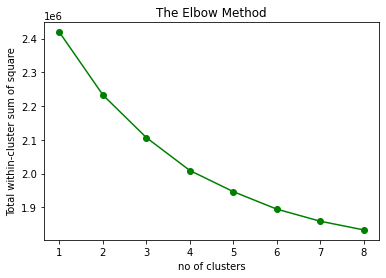

2 of KFold 10


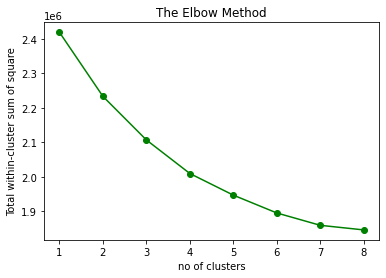

3 of KFold 10


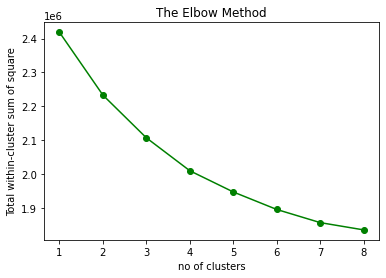

4 of KFold 10


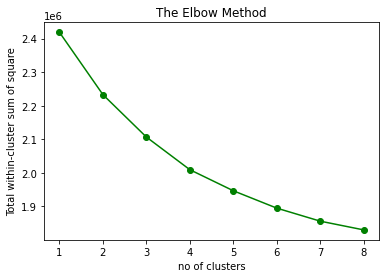

5 of KFold 10


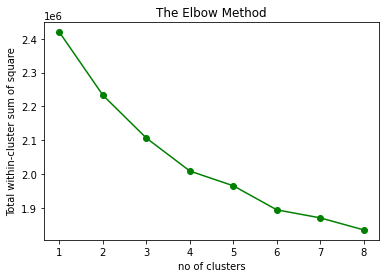

6 of KFold 10


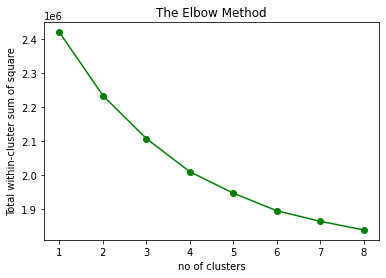

7 of KFold 10


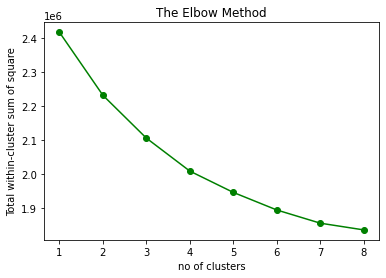

8 of KFold 10


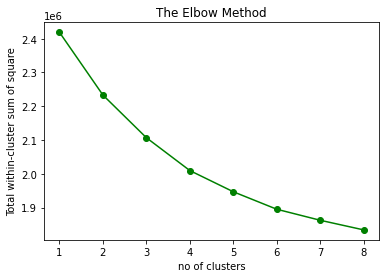

9 of KFold 10


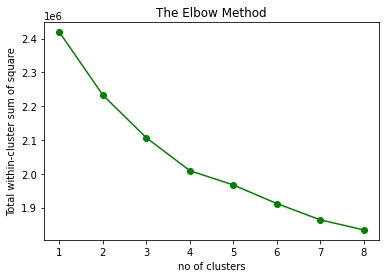

10 of KFold 10


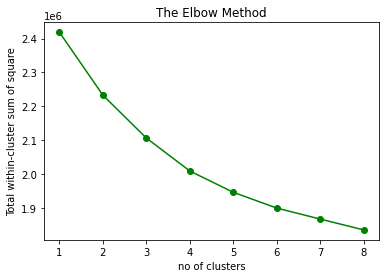

In [13]:
## Elbow method (K-mean method) (stratified cross-validation)
### Ref: https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
i=1
scoreE1_all=[]
for train_index,test_index in Skf.split(SafeDriver_X,SafeDriver_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = SafeDriver_X[train_index],SafeDriver_X[test_index]
    y_tr,y_v = SafeDriver_Y[train_index],SafeDriver_Y[test_index]

    scoreEl = []
    for cluster in range(1,9):
        kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=49)
        kmeans.fit(x_tr)
        scoreEl.append(kmeans.inertia_)
    scoreE1_all.append(scoreEl)

    # plotting the score

    plt.plot(range(1,9), scoreEl, 'g-o')
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('Total within-cluster sum of square')
    plt.show()
    i+=1
    ## Total within-cluster sum of square: https://www.jamleecute.com/partitional-clustering-kmeans-kmedoid/

In [0]:
## Silhouette score
### Ref_1: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
### Ref_2: https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette

import matplotlib.cm as cm

silhouette_avg_list = []
n_clusters_list = []
for n_clusters in range(2,9):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_tr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=49)
    cluster_labels = clusterer.fit_predict(x_tr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_tr, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_avg_list += [silhouette_avg]
    n_clusters_list += [n_clusters]
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_tr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x_tr[:, 2], x_tr[:, 8], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 2], centers[:, 8], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[8], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 3rd feature")
    ax2.set_ylabel("Feature space for the 9th feature")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.0719770227229144


In [0]:
plt.plot(n_clusters_list, silhouette_avg_list, 'g-o')
plt.title('The Silhouette method')
plt.xlabel('no of clusters')
plt.ylabel('The Silhouette score')
plt.show()
print(silhouette_avg_list)

### 6.2 K-mean method and save the information

In [0]:
## Ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=49).fit(x_tr)
kmLabels = kmeans.labels_
Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
centroids = kmeans.cluster_centers_
print('Label:', Label)
print('Centroids',centroids)

## 7. Mixture Method
A new approach to dealing with imbalanced datasets, based on a mixture of
supervised and unsupervised learning.

In [0]:
## Partition each of the datasets into 10 bins
## , keeping the imbalance ratio from the original dataset 
## Ref: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
Label_all = []
centroids_all = []

cv_percisionRFnew =[]
cv_recallRFnew =[]
cv_F1scoreRFnew =[]
cv_scoreRFRocnew = []

ConfusionMatrix_all = []

i=1

## Use different 9 bins in training dataset,
## and remain one to be the testing dataset
for train_index,test_index in Skf.split(SafeDriver_X,SafeDriver_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = SafeDriver_X[train_index],SafeDriver_X[test_index]
    y_tr,y_v = SafeDriver_Y[train_index],SafeDriver_Y[test_index]

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=49).fit(x_tr)
    kmLabels = kmeans.labels_
    ## save the centroid and the number of samples in each cluster in each 9 bins
    Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
    Label_all += [Label]
    centroids = kmeans.cluster_centers_
    centroids_all += [centroids]

    ## plot the distribution of samples and the centroids
    plt.figure(figsize=(8,5))
    plt.title("SafeDriver of data points" "(%d of KFold 10)" %i, fontsize=18)
    plt.grid(True)
    plt.scatter(x_tr[kmeans.labels_ == 0, 2], x_tr[kmeans.labels_ == 0, 8],
                c='purple', label='cluster 0')
    plt.scatter(x_tr[kmeans.labels_ == 1, 2], x_tr[kmeans.labels_ == 1, 8],
                c='yellow', label='cluster 1')
    plt.scatter(centroids[0, 2], centroids[0, 8], marker='*', s=300, c='g', label='centroid 0')
    plt.scatter(centroids[1, 2], centroids[1, 8], marker='*', s=300, c='r', label='centroid 1')
    plt.legend()
    plt.savefig('SafeDriver_Kmean_' + str(i) + 'of K fold 10.png', dpi=300)
    plt.show()

    ## train and test the dataset in random forest model
    modelRFnew = RandomForestClassifier(random_state=42)
    modelRFnew.fit(x_tr,kmLabels)

    percisionRFnew=precision_score(y_v,modelRFnew.predict(x_v))
    recallRFnew=recall_score(y_v,modelRFnew.predict(x_v))
    F1scoreRFnew=f1_score(y_v,modelRFnew.predict(x_v))
    scoreRFRocnew = roc_auc_score(y_v,modelRFnew.predict(x_v))

    cv_percisionRFnew.append(percisionRFnew)
    cv_recallRFnew.append(recallRFnew)
    cv_F1scoreRFnew.append(F1scoreRFnew)
    cv_scoreRFRocnew.append(scoreRFRocnew)

    print('Confusion matrix\n',confusion_matrix(y_v,modelRFnew.predict(x_v)))
    print('Precision:', precision_score(y_v,modelRFnew.predict(x_v)))
    print('Recall:',recall_score(y_v,modelRFnew.predict(x_v)))
    print('F1 score:', f1_score(y_v,modelRFnew.predict(x_v)))
    print('ROC AUC score:',scoreRFRocnew)
    
    from sklearn.metrics import confusion_matrix    
    ConfusionMatrix = confusion_matrix(y_v, modelRFnew.predict(x_v))
    ConfusionMatrix_all += [ConfusionMatrix]
    i+=1

In [0]:
from statistics import mean, stdev
print("Mean of percision:", round(mean(cv_percisionRFnew),3), '\nStandard Deviation of percision:', round(stdev(cv_percisionRFnew),3))
print("Mean of recall:", round(mean(cv_recallRFnew),3), '\nStandard Deviation of recall:', round(stdev(cv_recallRFnew),3))
print("Mean of F1score:", round(mean(cv_F1scoreRFnew),3), '\nStandard Deviation of F1score:', round(stdev(cv_F1scoreRFnew),3))
print("Mean of Roc score:", round(mean(cv_scoreRFRocnew),3), '\nStandard Deviation of Roc score:', round(stdev(cv_scoreRFRocnew),3))

##  8.Compare Results

In [0]:
## Ref:https://plotly.com/python/box-plots/
## A boxplot of the cross-validation results for each method
import plotly.graph_objects as go

x = ['Percision', 'Percision', 'Percision', 'Percision', 'Percision', 'Percision', 'Percision', 'Percision', 'Percision', 'Percision', 'Percision', 'Percision',
     'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall',
     'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score', 'F1 Score',
     'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score', 'ROC-AUC Score']

fig = go.Figure()

fig.add_trace(go.Box(
    y=cv_percisionDT+cv_recallDT+cv_F1scoreDT+cv_scoreDTRoc,
    x=x,
    name='Decision Tree',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=cv_percisionRF+cv_recallRF+cv_F1scoreRF+cv_scoreRFRoc,
    x=x,
    name='Random Forest',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=cv_percisionRFnew+cv_recallRFnew+cv_F1scoreRFnew+cv_scoreRFRocnew,
    x=x,
    name='Mixture Method',
    marker_color='#FF851B'
))


fig.update_layout(
    yaxis_title='Score',
    boxmode='group' # group together boxes of the different traces for each value of x
)
fig.show()